In [ ]:
# Dataset : http://cb.lk/covid_19
 
#!wget http://cb.lk/covid_19

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
#(covid + normal)
!unzip /content/gdrive/MyDrive/CovidDataset.zip

Archive:  /content/gdrive/MyDrive/CovidDataset.zip
   creating: CovidDataset/Train/
   creating: CovidDataset/Train/Covid/
  inflating: CovidDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: CovidDataset/Train/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png  
  infl

In [31]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"



In [32]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [33]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

In [35]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [36]:
train_generator = train_datagen.flow_from_directory(
    '/content/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 364 images belonging to 2 classes.


In [37]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [38]:
validation_generator = test_dataset.flow_from_directory(
    '/content/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [39]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
10/10 [==============================] - 15s 2s/step - loss: 0.8963 - accuracy: 0.5173 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/30
10/10 [==============================] - 14s 1s/step - loss: 0.6866 - accuracy: 0.5352 - val_loss: 0.6860 - val_accuracy: 0.5000
Epoch 3/30
10/10 [==============================] - 14s 1s/step - loss: 0.6691 - accuracy: 0.6118 - val_loss: 0.6474 - val_accuracy: 0.8833
Epoch 4/30
10/10 [==============================] - 13s 1s/step - loss: 0.5864 - accuracy: 0.7265 - val_loss: 0.5884 - val_accuracy: 0.7167
Epoch 5/30
10/10 [==============================] - 14s 1s/step - loss: 0.5123 - accuracy: 0.7289 - val_loss: 0.5138 - val_accuracy: 0.7833
Epoch 6/30
10/10 [==============================] - 14s 1s/step - loss: 0.5228 - accuracy: 0.7346 - val_loss: 0.5492 - val_accuracy: 0.7167
Epoch 7/30
10/10 [==============================] - 14s 1s/step - loss: 0.4913 - accuracy: 0.7619 - val_loss: 0.5177 - val_accuracy: 0.7500
Epoch 8/30
10/10 [==

In [40]:
model.save("modeln.h5")

In [41]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.3039412796497345, 0.901098906993866]

In [42]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.5166184902191162, 0.7833333611488342]

In [43]:
model=load_model("modeln.h5")

In [44]:


import os


In [45]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [46]:
y_actual=[]
y_test=[]

In [47]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [48]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [49]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
cm=confusion_matrix(y_actual,y_test)

In [ ]:
!pip install seaborn

In [52]:
import seaborn as sns

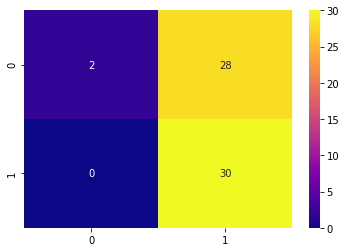

In [53]:
sns.heatmap(cm,cmap="plasma",annot=True)